<a href="https://colab.research.google.com/github/Jaya9522/almabetter_assignments/blob/main/Self_Project_Insurance_Decisioning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b> <u>Problem Statement</u></b>

### Picture this. You are a data scientist in a start-up culture with the potential to have a very large impact on the business. Oh, and you are backed up by a company with 140 years' business experience.

### Curious? Great! You are the kind of person we are looking for.

### Prudential, one of the largest issuers of life insurance in the USA, is hiring passionate data scientists to join a newly-formed Data Science group solving complex challenges and identifying opportunities. The results have been impressive so far but they want more. 

### In a one-click shopping world with on-demand everything, the life insurance application process is antiquated. Customers provide extensive information to identify risk classification and eligibility, including scheduling medical exams, a process that takes an average of 30 days.

### The result? People are turned off. That’s why only 40% of U.S. households own individual life insurance. Prudential wants to make it quicker and less labor intensive for new and existing customers to get a quote while maintaining privacy boundaries.

### By developing a predictive model that accurately classifies risk using a more automated approach, you can greatly impact public perception of the industry.

### The results will help Prudential better understand the predictive power of the data points in the existing assessment, enabling them to significantly streamline the process.

## <b>In this self project, you are required to do </b>

* ### Perform exploratory data analysis
* ### Build logistic regression, random forest, gradient boosted decision trees and xgboost models
* ### Evaluate the performance of the models using different set of metrics and prepare a final dataframe containing the train and test metrics for each of the models

## <b>Some of the guidelines for the project :</b>
* ### Describe in detail each of the experiments 
* ### Include plots and charts
* ### Draw the final conclusion on the basis of comparison of different models. 

# <b><u>Variable Description 

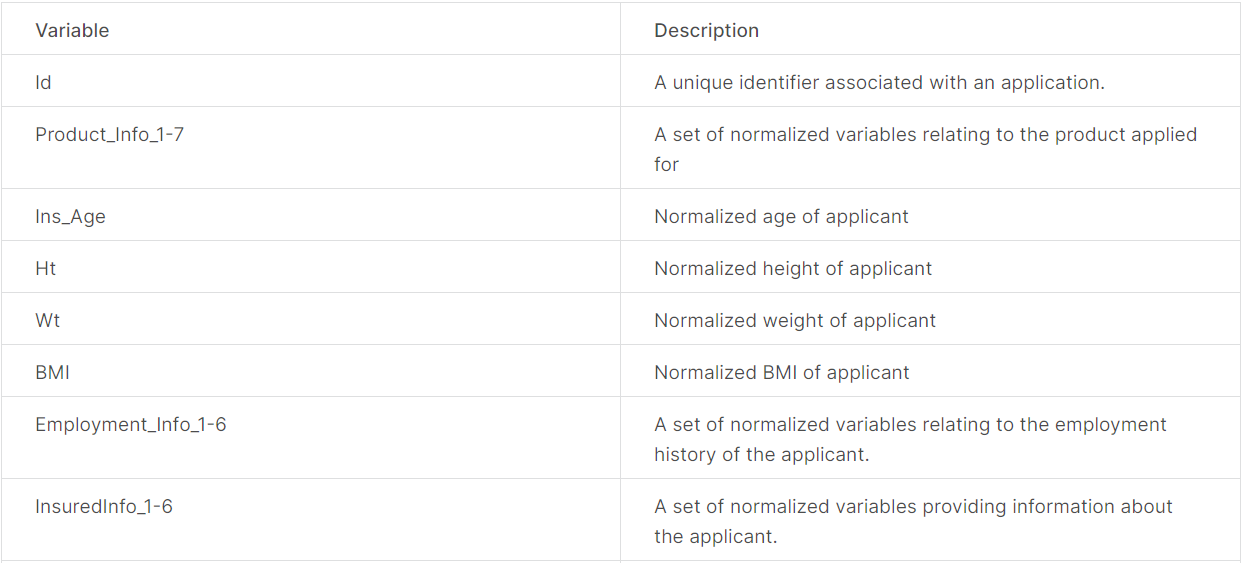

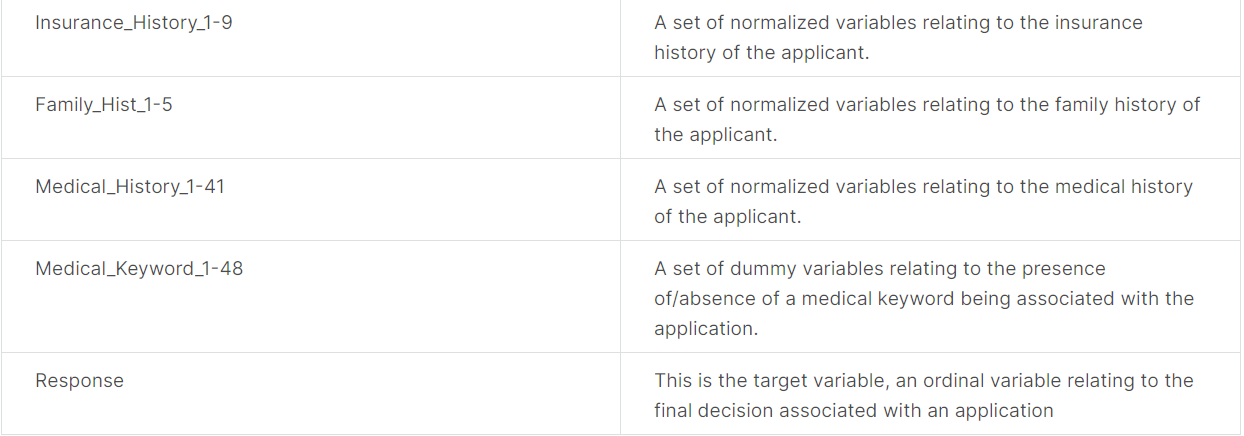

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import train_test_split
from sklearn import ensemble

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
path = "/content/drive/MyDrive/DATA SET/test.csv"
insurance_df = pd.read_csv(path, index_col='Id')

In [4]:
insurance_df.head()

,Product_Info_1,Product_Info_2,Product_Info_3,Product_Info_4,Product_Info_5,Product_Info_6,Product_Info_7,Ins_Age,Ht,Wt,...,Medical_Keyword_39,Medical_Keyword_40,Medical_Keyword_41,Medical_Keyword_42,Medical_Keyword_43,Medical_Keyword_44,Medical_Keyword_45,Medical_Keyword_46,Medical_Keyword_47,Medical_Keyword_48
Id,,,,,,,,,,,,,,,,,,,,,
1,1,D3,26,0.487179,2,3,1,0.611940,0.781818,0.338912,...,0,0,0,0,0,0,0,0,0,0
3,1,A2,26,0.076923,2,3,1,0.626866,0.727273,0.311715,...,0,0,0,0,0,0,0,0,0,0
4,1,D3,26,0.144667,2,3,1,0.582090,0.709091,0.320084,...,0,0,0,0,0,0,0,0,0,0
9,1,A1,26,0.151709,2,1,1,0.522388,0.654545,0.267782,...,0,0,0,0,0,0,0,0,1,1
12,1,A1,26,0.076923,2,3,1,0.298507,0.672727,0.246862,...,0,0,0,0,0,0,0,0,0,0


In [5]:
insurance_df.shape

(19765, 126)

In [11]:
pd.set_option('display.max_columns',None)

In [12]:
insurance_df.describe()

,Product_Info_1,Product_Info_3,Product_Info_4,Product_Info_5,Product_Info_6,Product_Info_7,Ins_Age,Ht,Wt,BMI,Employment_Info_1,Employment_Info_2,Employment_Info_3,Employment_Info_4,Employment_Info_5,Employment_Info_6,InsuredInfo_1,InsuredInfo_2,InsuredInfo_3,InsuredInfo_4,InsuredInfo_5,InsuredInfo_6,InsuredInfo_7,Insurance_History_1,Insurance_History_2,Insurance_History_3,Insurance_History_4,Insurance_History_5,Insurance_History_7,Insurance_History_8,Insurance_History_9,Family_Hist_1,Family_Hist_2,Family_Hist_3,Family_Hist_4,Family_Hist_5,Medical_History_1,Medical_History_2,Medical_History_3,Medical_History_4,Medical_History_5,Medical_History_6,Medical_History_7,Medical_History_8,Medical_History_9,Medical_History_10,Medical_History_11,Medical_History_12,Medical_History_13,Medical_History_14,Medical_History_15,Medical_History_16,Medical_History_17,Medical_History_18,Medical_History_19,Medical_History_20,Medical_History_21,Medical_History_22,Medical_History_23,Medical_History_24,Medical_History_25,Medical_History_26,Medical_History_27,Medical_History_28,Medical_History_29,Medical_History_30,Medical_History_31,Medical_History_32,Medical_History_33,Medical_History_34,Medical_History_35,Medical_History_36,Medical_History_37,Medical_History_38,Medical_History_39,Medical_History_40,Medical_History_41,Medical_Keyword_1,Medical_Keyword_2,Medical_Keyword_3,Medical_Keyword_4,Medical_Keyword_5,Medical_Keyword_6,Medical_Keyword_7,Medical_Keyword_8,Medical_Keyword_9,Medical_Keyword_10,Medical_Keyword_11,Medical_Keyword_12,Medical_Keyword_13,Medical_Keyword_14,Medical_Keyword_15,Medical_Keyword_16,Medical_Keyword_17,Medical_Keyword_18,Medical_Keyword_19,Medical_Keyword_20,Medical_Keyword_21,Medical_Keyword_22,Medical_Keyword_23,Medical_Keyword_24,Medical_Keyword_25,Medical_Keyword_26,Medical_Keyword_27,Medical_Keyword_28,Medical_Keyword_29,Medical_Keyword_30,Medical_Keyword_31,Medical_Keyword_32,Medical_Keyword_33,Medical_Keyword_34,Medical_Keyword_35,Medical_Keyword_36,Medical_Keyword_37,Medical_Keyword_38,Medical_Keyword_39,Medical_Keyword_40,Medical_Keyword_41,Medical_Keyword_42,Medical_Keyword_43,Medical_Keyword_44,Medical_Keyword_45,Medical_Keyword_46,Medical_Keyword_47,Medical_Keyword_48
count,19765.000000,19765.000000,19765.000000,19765.000000,19765.000000,19765.000000,19765.000000,19765.000000,19765.000000,19765.000000,19762.000000,19765.000000,19765.000000,17628.000000,19765.000000,15978.000000,19765.000000,19765.000000,19765.000000,19765.000000,19765.000000,19765.000000,19765.000000,19765.000000,19765.000000,19765.000000,19765.000000,11660.000000,19765.000000,19765.00000,19765.000000,19765.000000,9885.000000,8701.000000,13088.000000,6141.000000,16793.000000,19765.000000,19765.000000,19765.000000,19765.000000,19765.000000,19765.000000,19765.000000,19765.000000,201.000000,19765.000000,19765.000000,19765.000000,19765.000000,4901.000000,19765.000000,19765.000000,19765.000000,19765.000000,19765.000000,19765.000000,19765.000000,19765.000000,1180.000000,19765.000000,19765.000000,19765.000000,19765.000000,19765.000000,19765.000000,19765.000000,351.000000,19765.000000,19765.000000,19765.000000,19765.000000,19765.000000,19765.000000,19765.000000,19765.000000,19765.000000,19765.000000,19765.000000,19765.000000,19765.000000,19765.000000,19765.000000,19765.000000,19765.000000,19765.000000,19765.000000,19765.000000,19765.000000,19765.000000,19765.000000,19765.000000,19765.000000,19765.000000,19765.000000,19765.000000,19765.000000,19765.000000,19765.000000,19765.00000,19765.000000,19765.000000,19765.000000,19765.000000,19765.000000,19765.000000,19765.000000,19765.000000,19765.000000,19765.000000,19765.000000,19765.000000,19765.000000,19765.000000,19765.000000,19765.000000,19765.000000,19765.00000,19765.000000,19765.000000,19765.000000,19765.000000,19765.000000,19765.000000,19765.000000
mean,1.024994,24.321730,0.324381,2.006527,2.655755,1.043410,0.414901,0.705846,0.292557,0.470708,0.078975,8.443612,1.325525,0.006513,2.149051,0.368569,1.204098,2.00